In [196]:
import pandas as pd
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt

# etape 1 : prepareation et exploration

##  telechargement et chargement des donnees

In [197]:
data_train = pd.read_csv('HR-Employee-Attrition.csv', sep=',')

##  exploration des donnees

In [198]:
data_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [199]:
data_train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [200]:
def preprocessing_data(dataframe):
    #Missing value
    print(f"Missing value : {dataframe.isna().sum().sum()}")
    print("=" * 75)
    print(f"Duplicate value : {dataframe.duplicated().sum().sum()}")
    print("=" * 75)
    print(f"target value : {dataframe['Attrition'].unique()}")
    print("=" * 75)
    print(f"train info data : {dataframe.info(max_cols=37)}")

In [201]:
preprocessing_data(data_train)

Missing value : 0
Duplicate value : 0
target value : ['Yes' 'No']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolveme

In [202]:
object_columns = data_train.select_dtypes(include=['object']).columns.tolist()
object_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [203]:

#write fonction whose show unique values 
def print_unique_values(dataframe, columns):
    """
    print unique values for specific colums in dataframe
    parm dataframe : pd.dataframe it's the dataframe of data
    param columns : list, it's les columns that we want the uniques values
    """

    for column in columns:
        unique_values = dataframe[column].unique()
        print(f"{column} unique value : {unique_values}")
        print("=" * 75)

In [204]:
print_unique_values(data_train, object_columns)

Attrition unique value : ['Yes' 'No']
BusinessTravel unique value : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department unique value : ['Sales' 'Research & Development' 'Human Resources']
EducationField unique value : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender unique value : ['Female' 'Male']
JobRole unique value : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus unique value : ['Single' 'Married' 'Divorced']
Over18 unique value : ['Y']
OverTime unique value : ['Yes' 'No']


In [205]:
def print_count_values(dataframe, columns):
    for column in columns:
        count_value  = dataframe[column].value_counts()
        print(f"{column} number of occurences : {count_value}")
        print("=" * 75)

In [206]:
print_count_values(data_train, object_columns)

Attrition number of occurences : Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel number of occurences : BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department number of occurences : Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField number of occurences : EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender number of occurences : Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole number of occurences : JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Resea

#   Etape 2 : Analyse exploratoire des donnees

## analyse des variablr cible et predictive

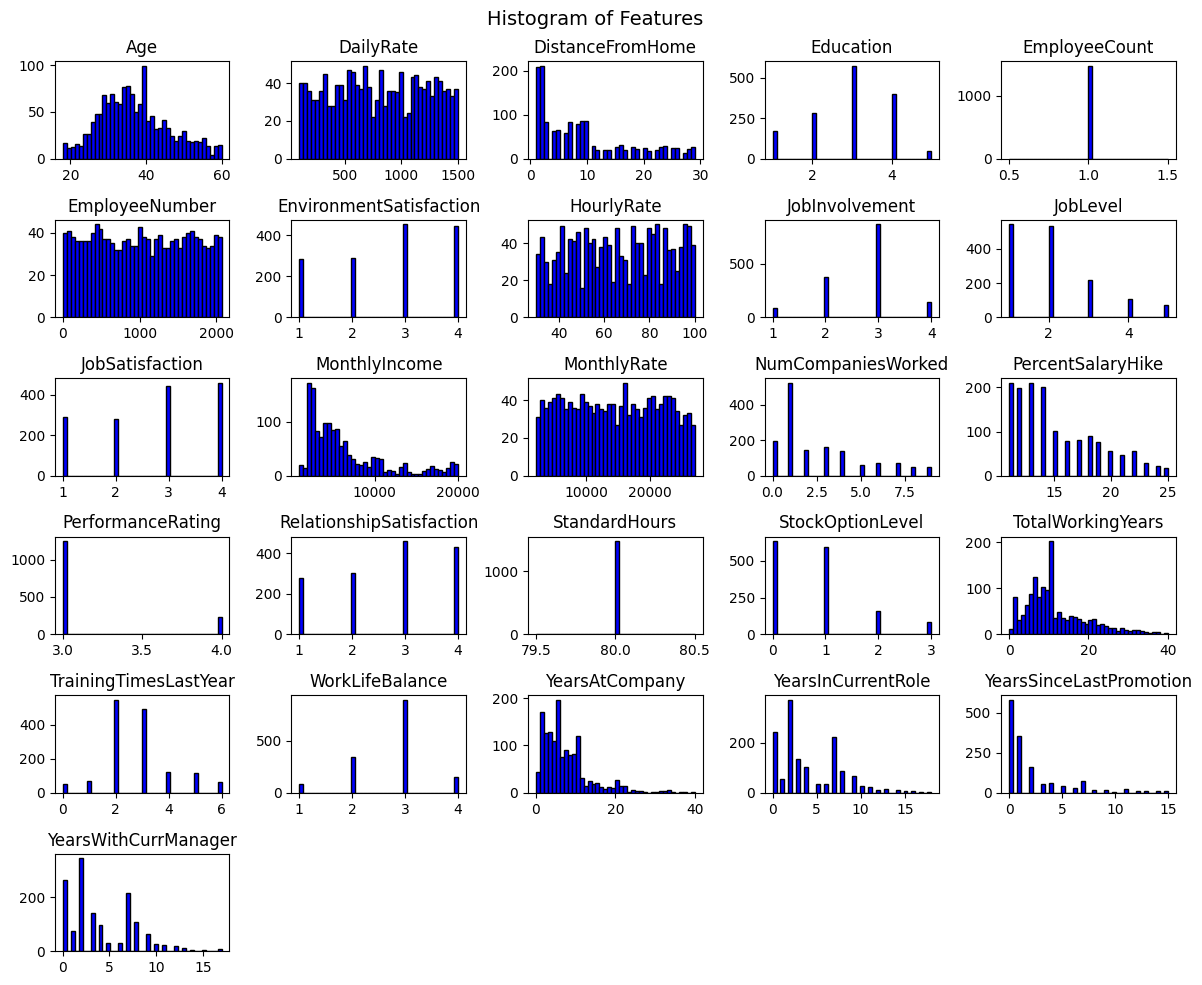

In [207]:
data_train.hist(bins=40, figsize=(12, 10), color='blue', edgecolor='black', grid=False)
plt.suptitle('Histogram of Features', fontsize=14)
plt.tight_layout()  
plt.show()

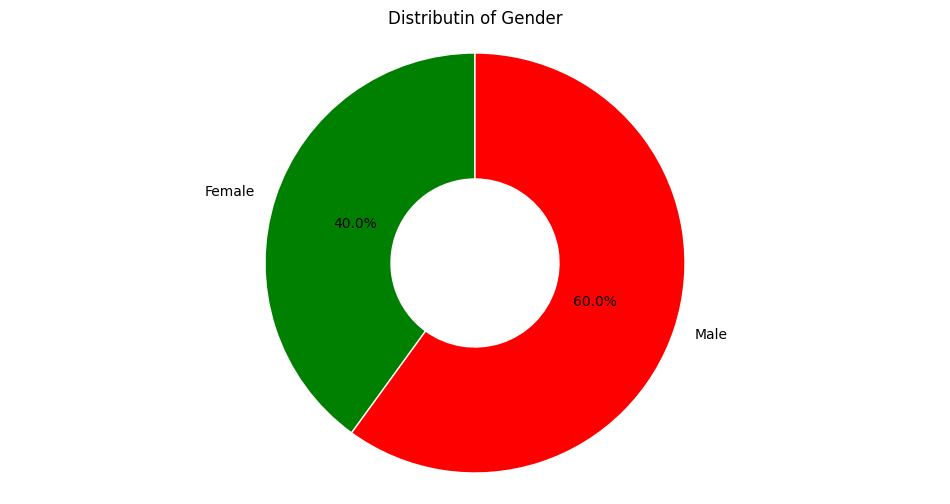

In [208]:
colors = ['green', 'red']
plt.figure(figsize=(12, 6))
plt.pie(data_train['Gender'].value_counts(ascending=True), explode=(0, 0),labels=data_train['Gender'].value_counts(ascending=True).index,colors=colors,
        autopct='%1.1f%%',
        startangle=90, 
        wedgeprops=dict(width=0.6, edgecolor='w')
)
plt.title('Distributin of Gender')
plt.axis('equal')
plt.show()

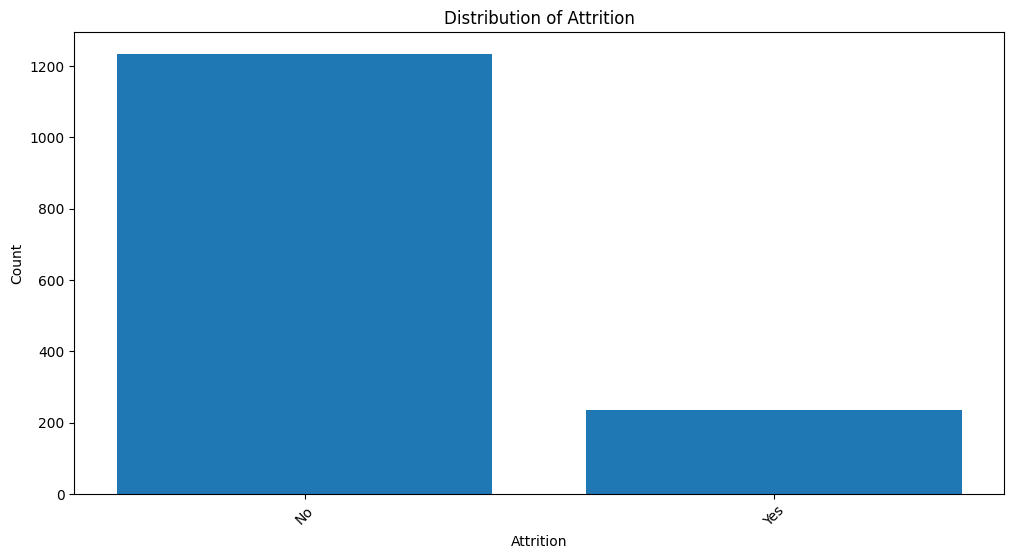

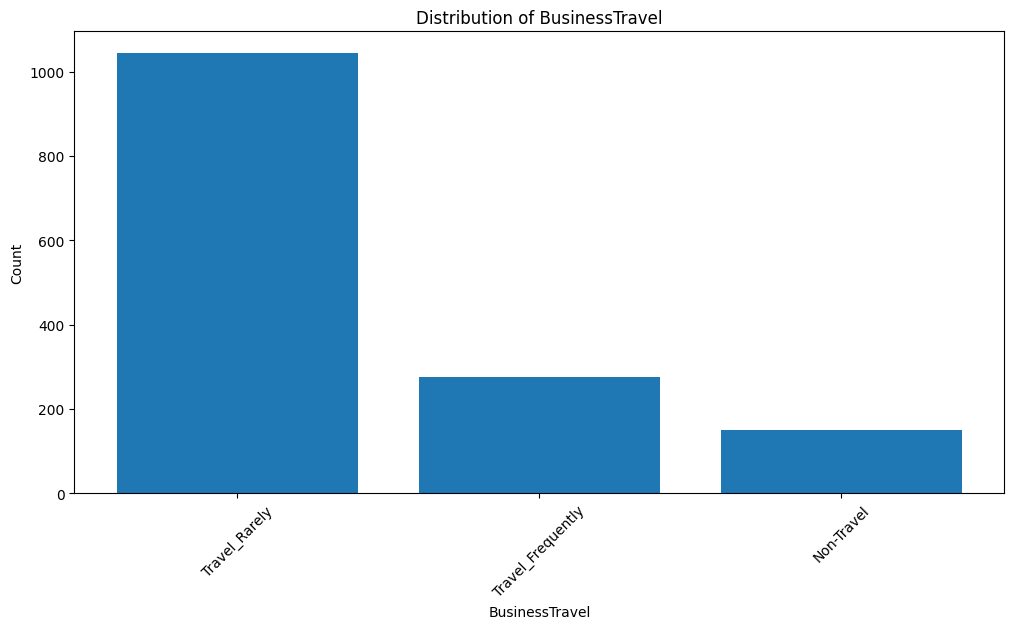

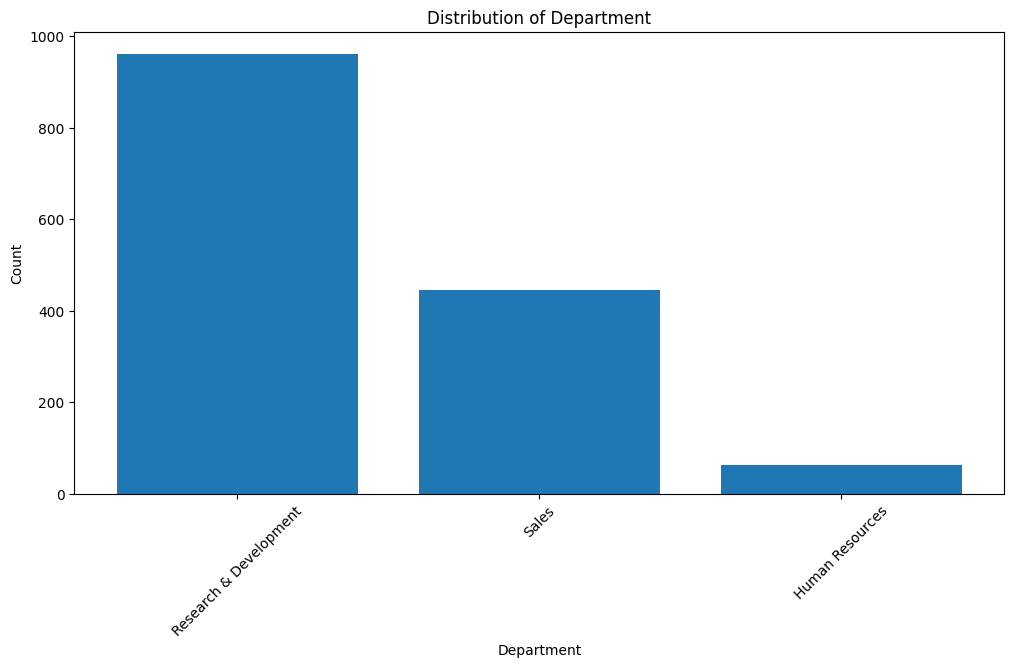

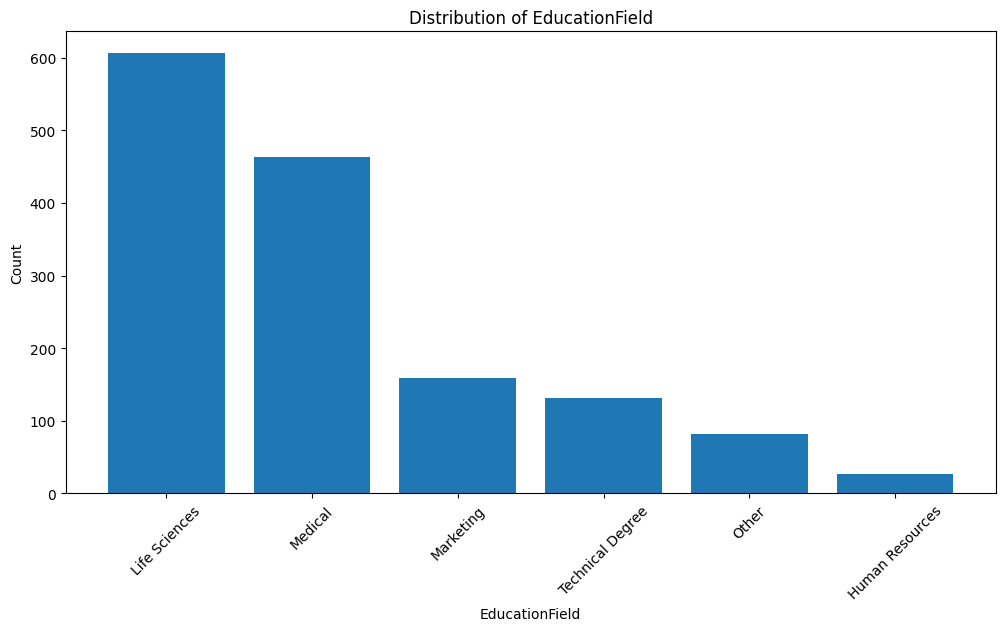

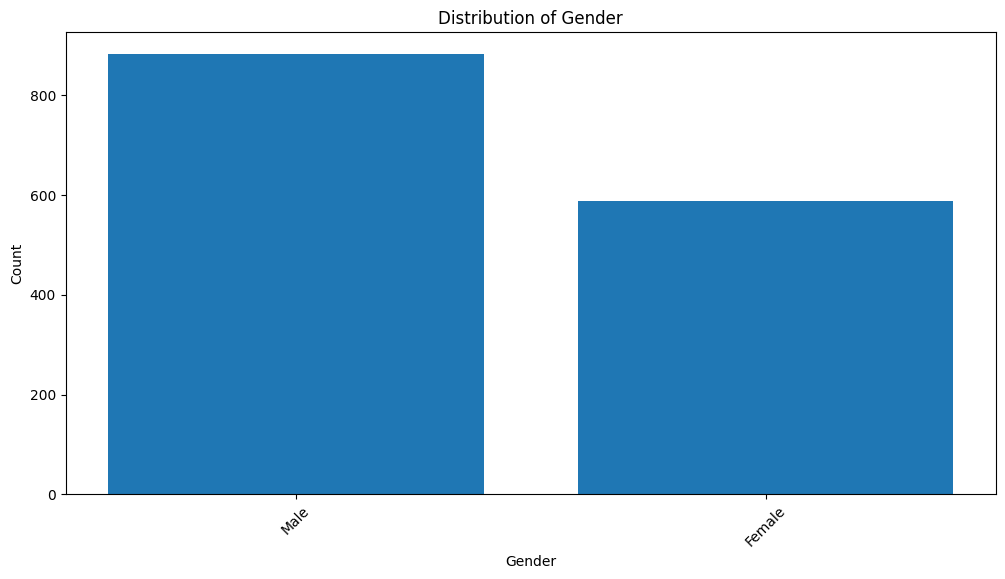

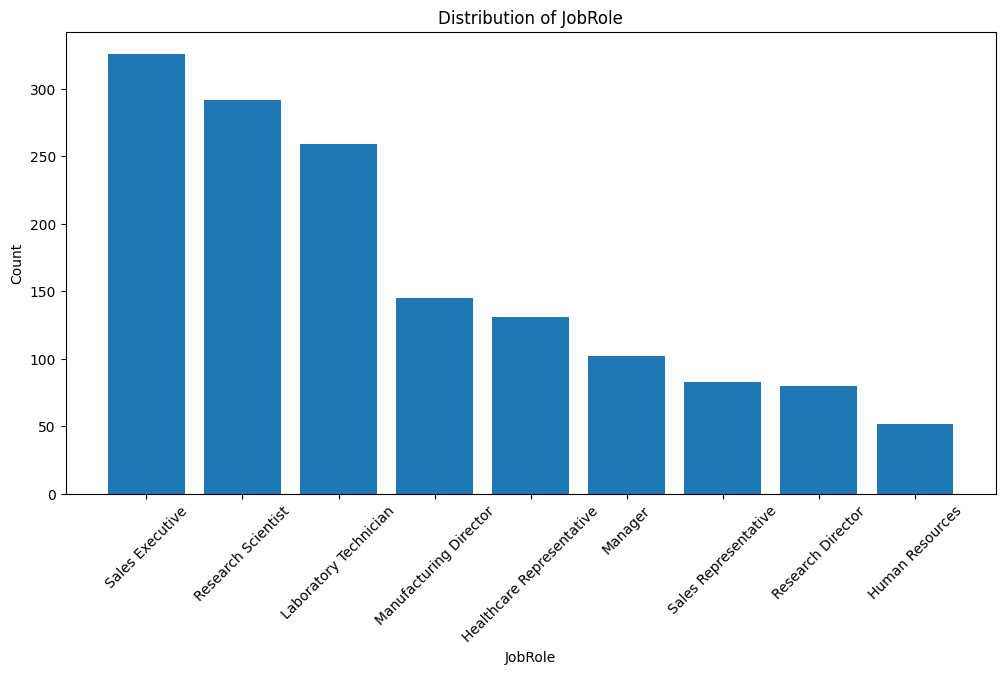

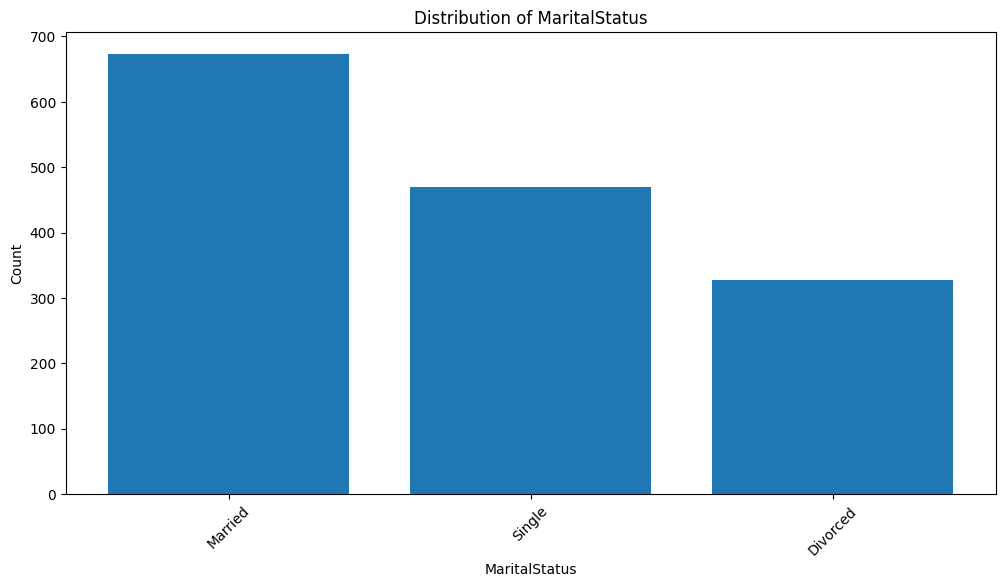

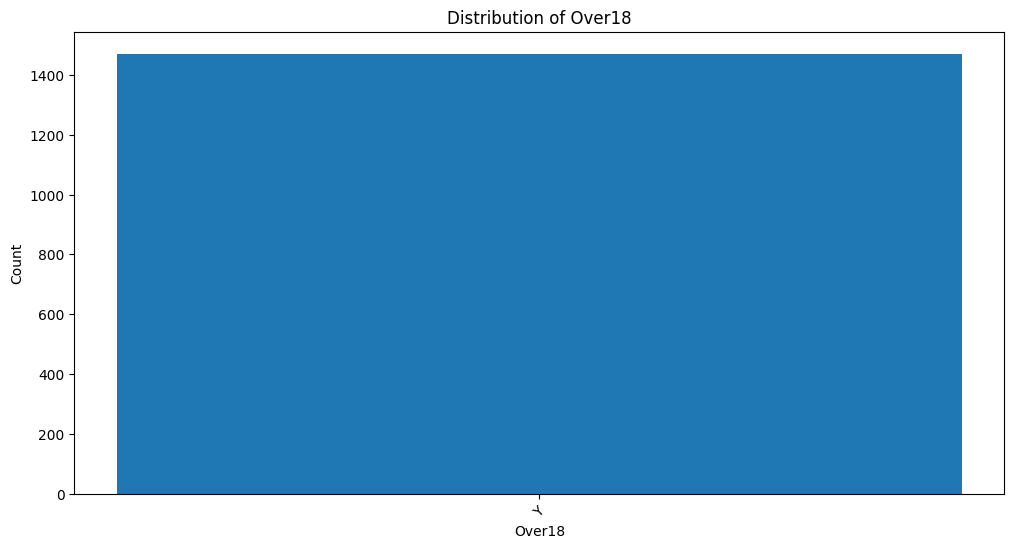

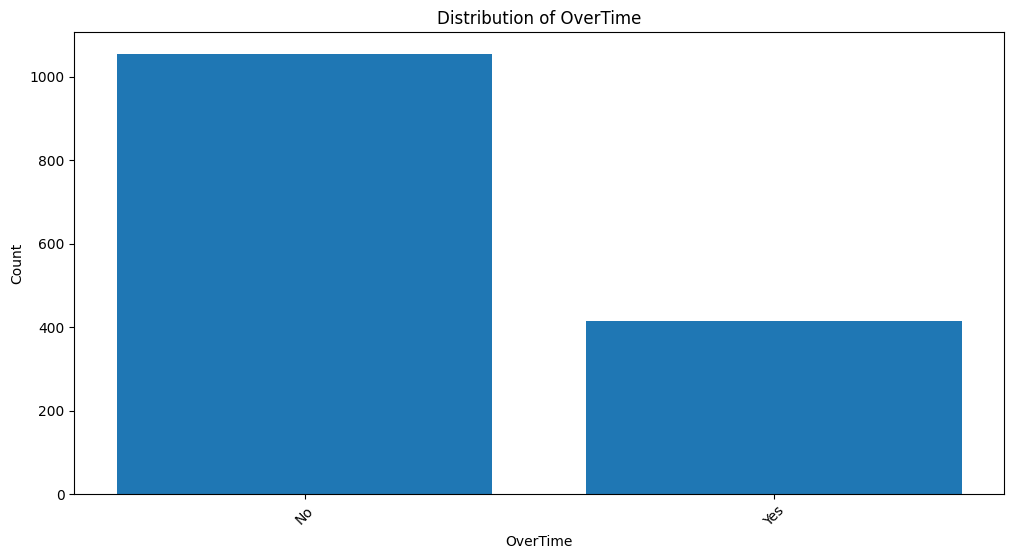

In [209]:
for col in object_columns:
    plt.figure(figsize=(12, 6))
    value_counts = data_train[col].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  
    plt.show()

<Axes: >

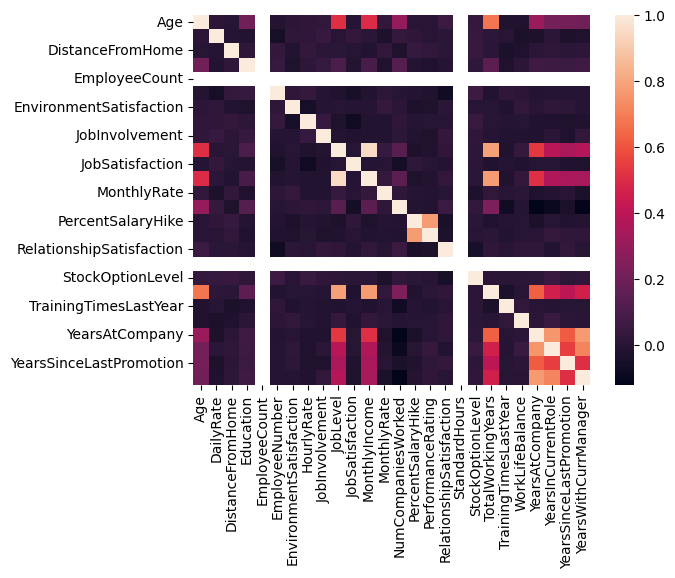

In [210]:
sns.heatmap(data_train.drop(object_columns, axis=1).corr())

# Etape 3 : preparation des donneespour le modele

##  encodate des donnees

In [211]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [212]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_features = encoder.fit_transform(data_train[object_columns])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(object_columns))

data = data_train.drop(columns=object_columns).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)
data['Attrition_Yes']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition_Yes, Length: 1470, dtype: float64

In [213]:
data_train['JobRole']

0                 Sales Executive
1              Research Scientist
2           Laboratory Technician
3              Research Scientist
4           Laboratory Technician
                  ...            
1465        Laboratory Technician
1466    Healthcare Representative
1467       Manufacturing Director
1468              Sales Executive
1469        Laboratory Technician
Name: JobRole, Length: 1470, dtype: object

In [214]:
# Supposons que la colonne 'Attrition' est votre variable cible, et elle a été encodée
y = data['Attrition_Yes']  # ou le nom correct de la colonne après encodage

# Supprimer la colonne cible des caractéristiques
X = data.drop(columns=['Attrition_Yes'])  # ou le nom correct de la colonne après encodage

# Split des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#   etape 4 : entrainement du model

In [215]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [216]:
y_pred = rf_model.predict(X_test)

In [217]:
accuracy_score = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {accuracy_score: .2f}')

accuracy_score:  0.87


In [218]:
f1 = f1_score(y_test, y_pred)
print(f'f1 {f1: .2f}')

f1  0.20


In [219]:
cross_val_score = cross_val_score(RandomForestClassifier(), X, y, cv=10)
print('cross_evaluation_score average ', cross_val_score.mean())

cross_evaluation_score average  0.85578231292517
